In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()
dataset.columns
dataset.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Handling Missing values


In [ ]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Observing Set of data

In [ ]:

dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:


dataset.shape

(768, 9)

Feature selection

In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


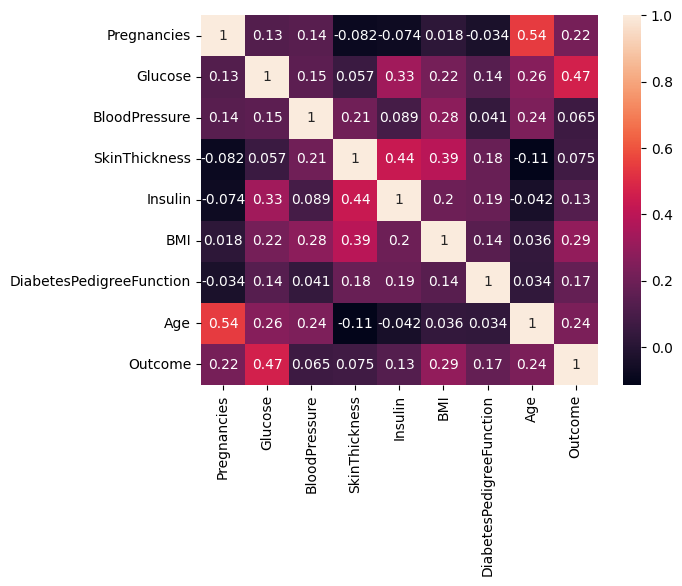

In [ ]:

ax = sns.heatmap(dataset.corr(), annot = True)


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation

<ipython-input-40-9004ca901dc4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

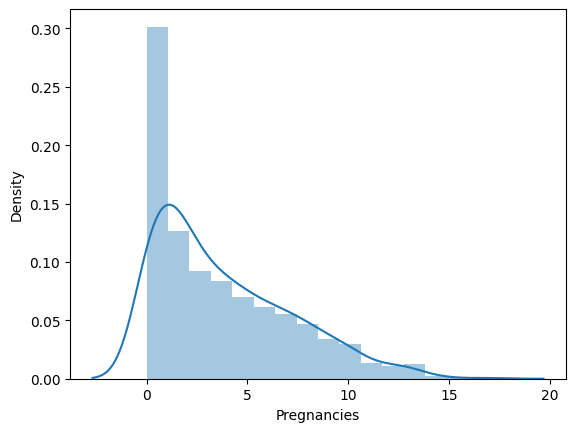

In [ ]:
sns.distplot(dataset.Pregnancies)

<ipython-input-41-11abab4d84dc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

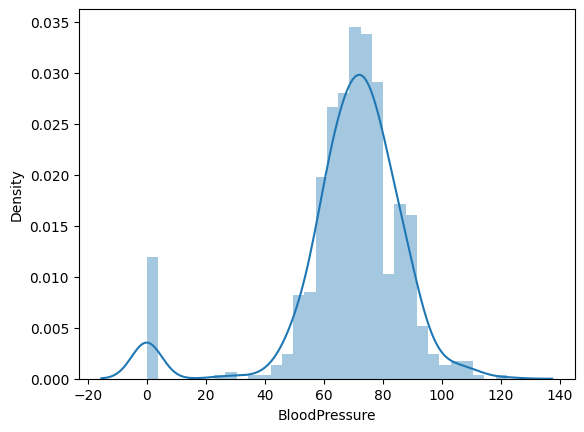

In [ ]:
sns.distplot(dataset.BloodPressure)

<ipython-input-42-1d9de08cc33b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

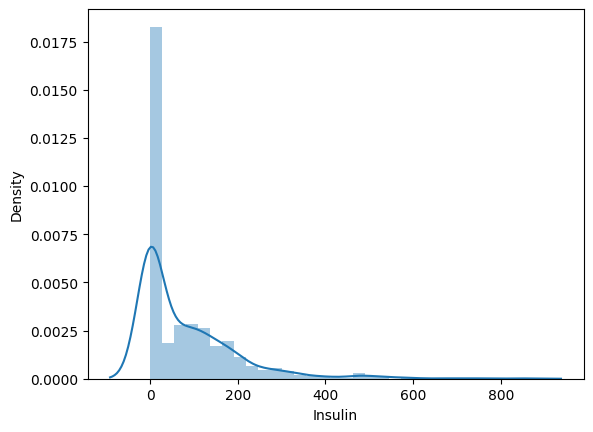

In [ ]:
sns.distplot(dataset.Insulin)

In [ ]:

dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].median())
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].median())
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].replace(0, dataset['DiabetesPedigreeFunction'].median())
dataset['Age'] = dataset['Age'].replace(0, dataset['Age'].median())

In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


<Axes: >

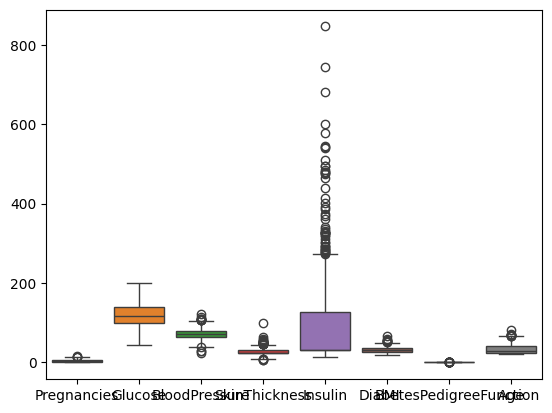

In [ ]:
sns.boxplot(x)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(new_x)

<Axes: >

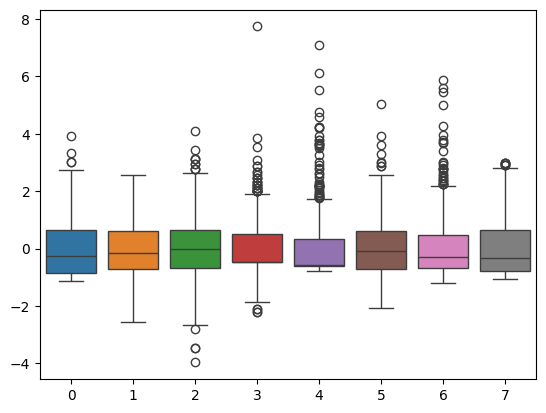

In [ ]:
sns.boxplot(x)

In [ ]:
dataset = pd.DataFrame(x, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.870083,-0.016984,0.822990,-0.612669,0.160901,0.468793,1.548281
1,-0.839847,-1.206570,-0.510935,0.175013,-0.612669,-0.858162,-0.361774,-0.162527
2,1.236518,2.023779,-0.675585,-0.472963,-0.612669,-1.338578,0.604211,-0.072485
3,-0.839847,-1.074719,-0.510935,-0.472963,-0.012978,-0.639792,-0.915485,-1.062953
4,-1.136471,0.507493,-2.651386,0.822990,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.679166,0.312316,2.226939,0.799202,0.058994,-0.903448,2.718835
755,-0.543224,0.013052,-0.181634,-0.040979,-0.612669,0.626758,-0.394876,-0.522698
756,0.346647,-0.019911,-0.016984,-0.472963,0.157014,-0.916395,-0.680760,-0.252570
757,-0.839847,0.144903,-1.004885,-0.472963,-0.612669,-0.348631,-0.367793,1.278154


<Axes: >

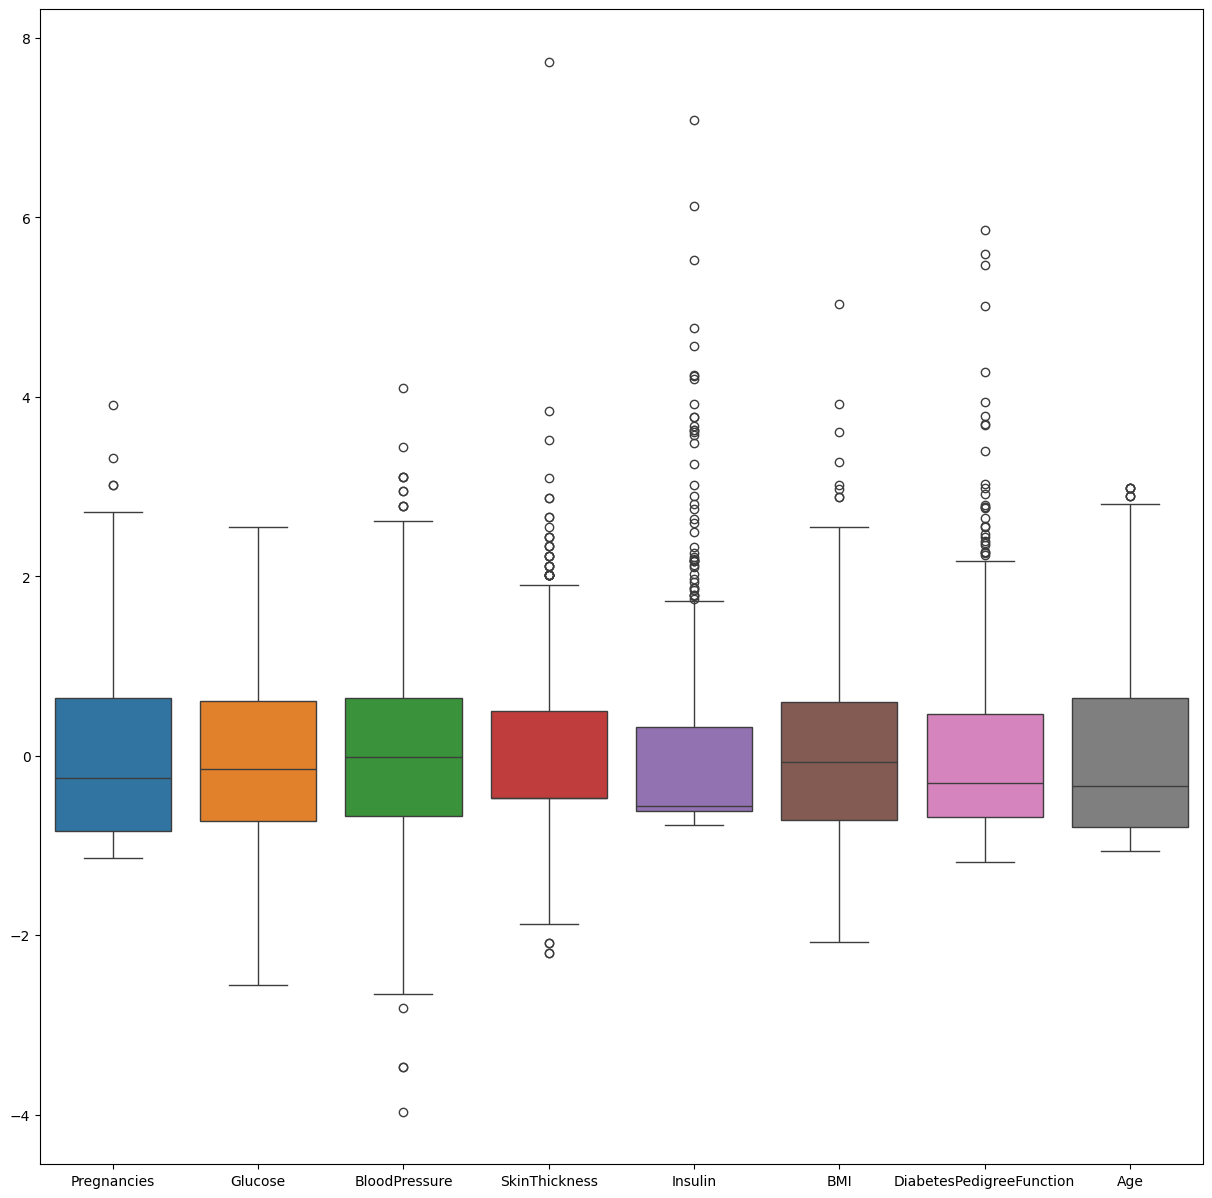

In [ ]:
plt.figure(figsize = (15,15))
sns.boxplot(dataset)

In [ ]:
q = dataset['Insulin'].quantile(.95)
mask = dataset['Insulin'] < q
dataset = dataset[mask]


<Axes: >

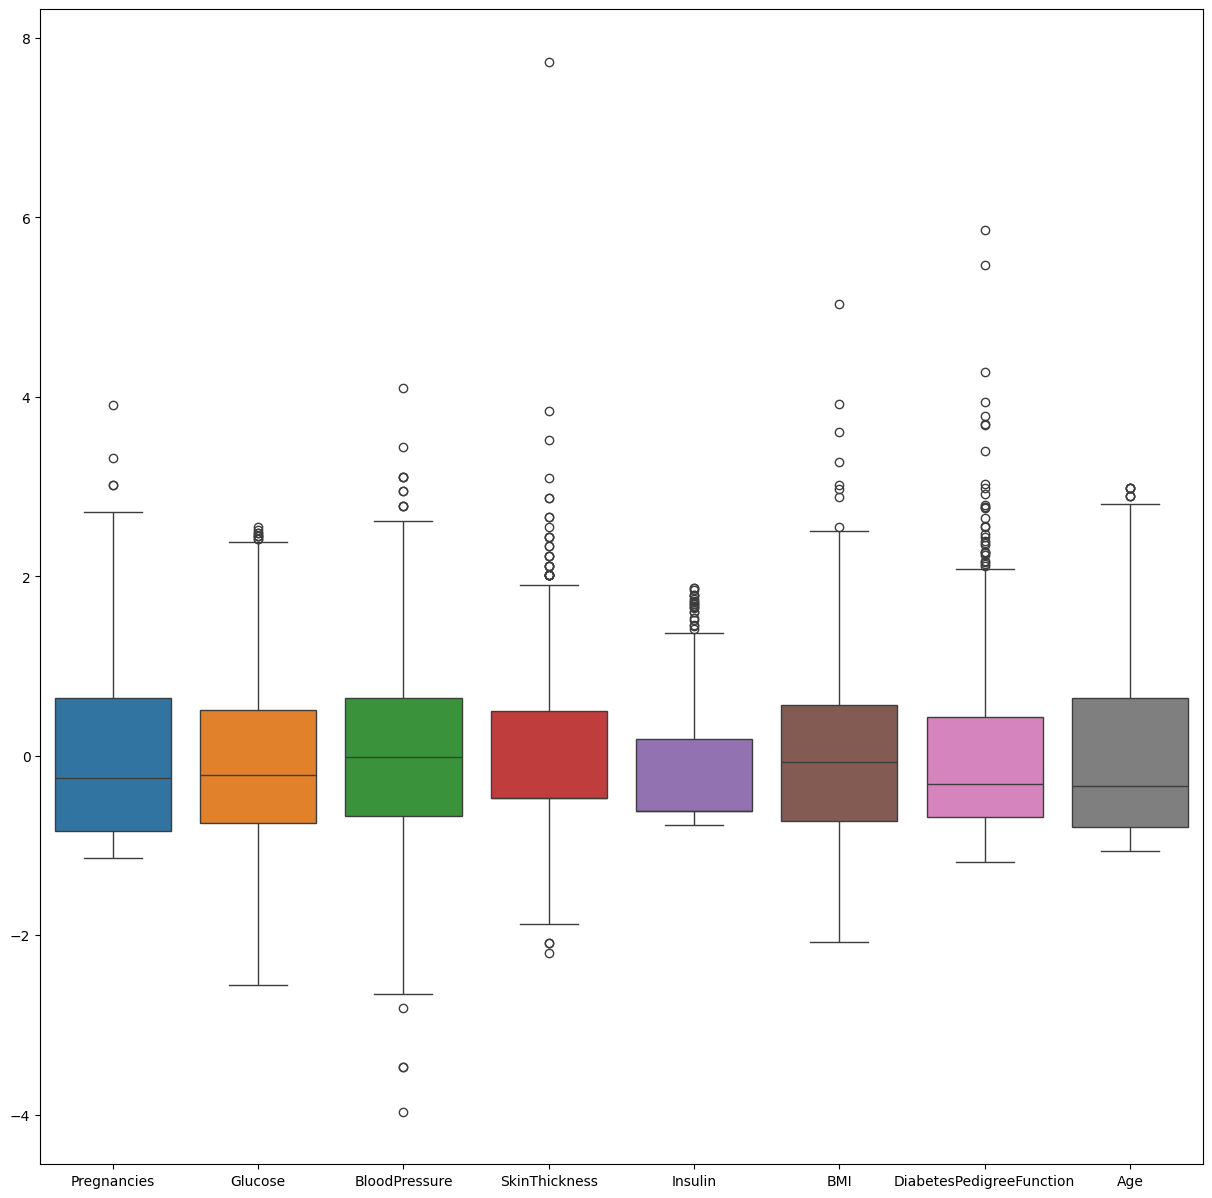

In [ ]:
plt.figure(figsize = (15,15))
sns.boxplot(dataset)

In [ ]:
dataset.shape

(721, 8)

In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
y_new = y[:dataset.shape[0]]
y_new

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
716,1
717,0
718,0
719,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, y_new, test_size = 0.33, random_state = 42)

In [ ]:
x_train.shape

(483, 8)

In [ ]:
x_test.shape

(238, 8)

In [ ]:
y_train.value_counts()

,count
Outcome,
0,311
1,172


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_samples, y_train_sampled = sm.fit_resample(x_train, y_train)

In [ ]:
y_train_sampled.value_counts()

,count
Outcome,
0,311
1,311


In [ ]:
x_train_samples.shape

(622, 8)

In [ ]:
x_test.shape

(238, 8)

In [ ]:
y_train_sampled.shape

(622,)

In [ ]:
y_test.shape

(238,)

In [ ]:
from sklearn.linear_model import LogisticRegression
Regression = LogisticRegression()
model = Regression.fit(x_train_samples, y_train_sampled)

In [ ]:
y_predictions = model.predict(x_test)
y_predictions

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
accuracy

0.46218487394957986

In [ ]:
from sklearn.metrics import classification_report
target_names = ['non-diabetic', 'diabetic']
print(classification_report(y_test, y_predictions, target_names = target_names))

              precision    recall  f1-score   support

non-diabetic       0.62      0.52      0.56       160
    diabetic       0.26      0.35      0.30        78

    accuracy                           0.46       238
   macro avg       0.44      0.43      0.43       238
weighted avg       0.50      0.46      0.48       238



In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('logisticregression.pkl', "wb"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')